In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("./archive/Bengaluru_House_Data.csv")
df1.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
12394,Super built-up Area,Ready To Move,Garudachar Palya,2 BHK,NaN,1154,2.0,1.0,51.8
11349,Super built-up Area,17-Mar,Kammagondahalli,3 BHK,DiiteR,1347,2.0,2.0,55.0
1831,Super built-up Area,Ready To Move,Chamrajpet,4 BHK,NaN,1900,2.0,1.0,170.0
391,Super built-up Area,Ready To Move,Sompura,2 BHK,Suiseit,825,2.0,1.0,33.0
8840,Plot Area,16-Dec,Chikka Tirupathi,4 Bedroom,Theanmp,4500,5.0,3.0,150.0


In [3]:
df1.shape

(13320, 9)

In [4]:
# first we will change the total_sqft column into numerical values 
# this function will indicate if the value is float or not 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [5]:
df1[df1["total_sqft"].apply(is_float) == False]
# all the returnd values are not float

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


In [6]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2 :
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [7]:
df2 = df1.copy()
df2["total_sqft"] = df1["total_sqft"].apply(convert_sqft_to_num)

In [8]:
len(df2[df2["total_sqft"].apply(is_float) == False])

0

In [9]:
# then lets change the size column to numirical
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
def str_to_int(x):
    try:
        x = int(x.split(" ")[0])
        return x
    except:
        return x  

In [11]:
df2["badrooms"] = df1["size"].apply(str_to_int)
df2.drop("size", axis="columns",inplace=True)
df2.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,badrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2.0


<h1>1- Explore the missing data</h1>

In [12]:
# 1- Explore the missing data
df2.isnull().sum()

area_type          0
availability       0
location           1
society         5502
total_sqft        46
bath              73
balcony          609
price              0
badrooms          16
dtype: int64

<AxesSubplot:>

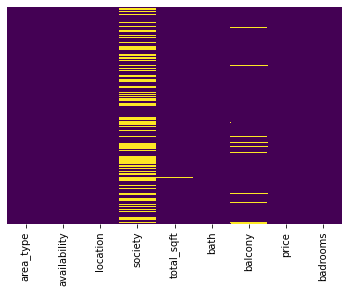

In [13]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# the yellow lines are the missing data so we notice that society have too much missing data so we will drop it

In [14]:
df2.drop("society", axis="columns",inplace=True)
df2.shape

(13320, 8)

<AxesSubplot:>

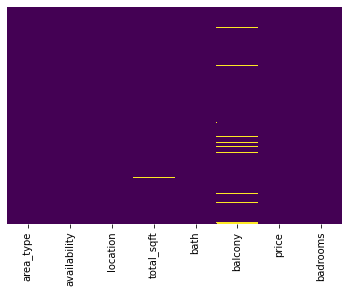

In [15]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# now we need to handle the other missing values

<AxesSubplot:xlabel='bath', ylabel='count'>

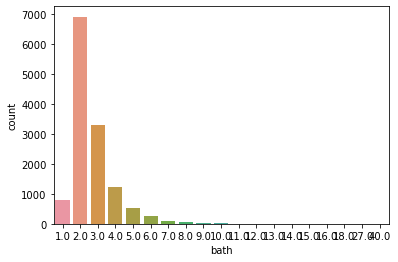

In [16]:
sns.countplot(x=df2["bath"])
# the majority have 2 baths

<AxesSubplot:xlabel='balcony', ylabel='count'>

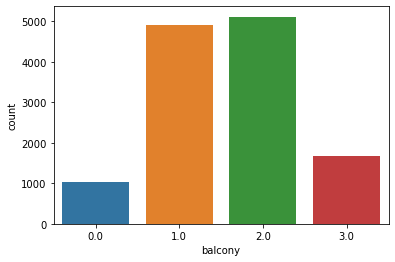

In [17]:
sns.countplot(x=df2["balcony"])
# the majority of houses have 2 or 1 balcony

<AxesSubplot:xlabel='badrooms', ylabel='count'>

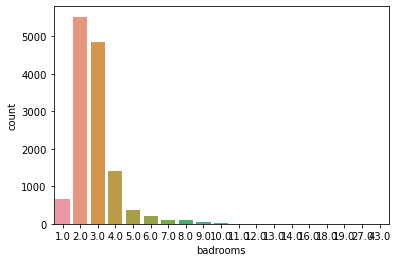

In [18]:
sns.countplot(x=df2["badrooms"])

In [19]:
# since the majority of the bedrooms are 2 we will fill the null values with 2
df2["badrooms"].fillna(2,inplace=True)
df2.isnull().sum()

area_type         0
availability      0
location          1
total_sqft       46
bath             73
balcony         609
price             0
badrooms          0
dtype: int64

<AxesSubplot:xlabel='badrooms', ylabel='balcony'>

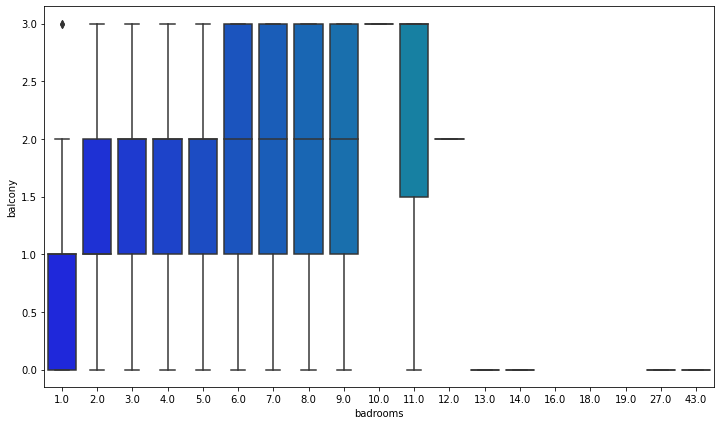

In [20]:
# lets see the relationship between the badrooms and the balcony
plt.figure(figsize=(12, 7))
sns.boxplot(x='badrooms',y='balcony',data=df2,palette='winter')

In [21]:
def replace_nan_in_balcony(col):
    balcony = col[0]
    badrooms = col[1]
    if pd.isnull(balcony):
        if badrooms == 1:
            return 0
        elif (badrooms == 2) | (badrooms == 3) | (badrooms == 4) | (badrooms == 5):
            return 1
        elif (badrooms > 5) & (badrooms < 10):
            return 2
        else: 
            return 3
    else:
        return balcony

In [22]:
df2["balcony"] = df2[['balcony','badrooms']].apply(replace_nan_in_balcony,axis=1)
df2.isnull().sum()

area_type        0
availability     0
location         1
total_sqft      46
bath            73
balcony          0
price            0
badrooms         0
dtype: int64

In [23]:
df2.groupby("badrooms")["total_sqft"].mean()
# here we have the mean of total sqft for every number of badrooms

badrooms
1.0       750.916121
2.0      1141.480463
3.0      1676.947830
4.0      2715.812125
5.0      2408.119574
6.0      2044.463500
7.0      2309.750000
8.0      1922.056818
9.0      2928.557692
10.0     3411.142857
11.0     3350.000000
12.0     2232.000000
13.0     5425.000000
14.0     1250.000000
16.0    10000.000000
18.0     1200.000000
19.0     2000.000000
27.0     8000.000000
43.0     2400.000000
Name: total_sqft, dtype: float64

In [24]:
def replace_nan_in_sqft(col):
    sqft = col[0]
    badrooms = col[1] 
    means = df2.groupby("badrooms")["total_sqft"].mean()
    if pd.isnull(sqft):
        return means[badrooms]
    else:
        return sqft

In [25]:
df2["total_sqft"] = df2[['total_sqft','badrooms']].apply(replace_nan_in_balcony,axis=1)
df2.isnull().sum()

area_type        0
availability     0
location         1
total_sqft       0
bath            73
balcony          0
price            0
badrooms         0
dtype: int64

In [26]:
# the rest we will drop it since we have a quite large dataset
df2.dropna(inplace=True)
df2.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
badrooms        0
dtype: int64

<h5>for the null values here we replace it with the mean but we can also create a separated model to predict the null values it will take much more time and comutation bu will give a better representation for the null values. if the null value if categorical we can even use k-means for clustering and giving categories to the null values</h5>

<h1>2-now lets remouve the outliers</h1>

In [27]:
# first lets add the price per sqft
df2["price_sqft"] = df2["price"] * 100000 / df2["total_sqft"]
df2.sample(5)

,area_type,availability,location,total_sqft,bath,balcony,price,badrooms,price_sqft
1643,Super built-up Area,18-May,Talaghattapura,2038.5,3.0,0.0,120.00,3.0,5886.681383
8373,Super built-up Area,Ready To Move,Sarjapur,1032.0,2.0,1.0,42.00,2.0,4069.767442
12143,Super built-up Area,19-Apr,Whitefield,1063.0,2.0,1.0,42.52,2.0,4000.000000
1079,Super built-up Area,20-Dec,Old Madras Road,1350.0,3.0,0.0,54.54,3.0,4040.000000
10745,Super built-up Area,Ready To Move,Devarabeesana Halli,1296.0,2.0,2.0,70.00,2.0,5401.234568


In [28]:
# for this we can use the mean and std if it is a normal distribution but here we will use percentile to remouve outliers
# expl on std :
# upper_limit = df.x.mean() + 3*df.height.std()
# lower_limit = df.height.mean() -3*df.height.std()
# in this way we will get around 99.7 of the data only the outlayers will be remouved

In [29]:
# for the percentile we use it like this
min_thresold, max_thresold = df2.price_sqft.quantile([0.05, 0.95])
min_thresold, max_thresold
# here we cant decide if it is good or note we need an expert in the houses price

(3112.1495327102803, 15749.58479874951)

In [30]:
# lets see our outliers
df2[(df2.price_sqft>max_thresold) | (df2.price_sqft<min_thresold)]

,area_type,availability,location,total_sqft,bath,balcony,price,badrooms,price_sqft
7,Super built-up Area,Ready To Move,Rajaji Nagar,3300.0,4.0,1.0,600.0,4.0,18181.818182
9,Plot Area,Ready To Move,Gandhi Bazar,1020.0,6.0,2.0,370.0,6.0,36274.509804
20,Built-up Area,Ready To Move,Kengeri,600.0,1.0,1.0,15.0,1.0,2500.000000
41,Super built-up Area,19-Dec,Sarjapur Road,1254.0,3.0,2.0,38.0,3.0,3030.303030
45,Plot Area,Ready To Move,HSR Layout,600.0,9.0,2.0,200.0,8.0,33333.333333
...,...,...,...,...,...,...,...,...,...
13275,Plot Area,Ready To Move,Kothannur,1600.0,4.0,2.0,45.0,4.0,2812.500000
13305,Carpet Area,Ready To Move,Hulimavu,500.0,1.0,3.0,220.0,1.0,44000.000000
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,1200.0,5.0,1.0,325.0,4.0,27083.333333
13311,Plot Area,Ready To Move,Ramamurthy Nagar,1500.0,9.0,2.0,250.0,7.0,16666.666667


In [31]:
df3 = df2[(df2.price_sqft<max_thresold) | (df2.price_sqft>min_thresold)]
df3.sample(10)

,area_type,availability,location,total_sqft,bath,balcony,price,badrooms,price_sqft
5433,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,1580.0,3.0,3.0,53.56,3.0,3389.873418
8004,Super built-up Area,Ready To Move,Sarjapur Road,7800.0,6.0,1.0,385.00,5.0,4935.897436
5544,Super built-up Area,21-Dec,Kanakpura Road,525.0,1.0,1.0,30.00,1.0,5714.285714
12832,Plot Area,18-Dec,Whitefield,1200.0,3.0,2.0,67.75,3.0,5645.833333
5670,Plot Area,Ready To Move,Singapura Village,2230.0,4.0,1.0,130.00,4.0,5829.596413
9679,Super built-up Area,Ready To Move,Ananth Nagar,1319.0,3.0,1.0,37.75,3.0,2862.016679
10044,Super built-up Area,Ready To Move,Sarjapur,1175.0,2.0,1.0,41.68,2.0,3547.234043
2960,Super built-up Area,Ready To Move,Hebbal,1420.0,2.0,1.0,99.39,2.0,6999.295775
5139,Built-up Area,Ready To Move,Devarachikkanahalli,615.0,1.0,1.0,24.00,1.0,3902.439024
8513,Super built-up Area,Ready To Move,Bethel Nagar,560.0,1.0,0.0,19.00,1.0,3392.857143


In [32]:
# lets remove the availibility and location since i am not using it
df3.drop("availability",inplace=True,axis=1)
df3.drop("location",inplace=True,axis=1)

df3.sample(5)

,area_type,total_sqft,bath,balcony,price,badrooms,price_sqft
8350,Super built-up Area,1000.0,2.0,1.0,29.7,2.0,2970.000000
4979,Super built-up Area,1016.0,2.0,2.0,40.0,2.0,3937.007874
5381,Super built-up Area,1020.0,2.0,1.0,52.0,2.0,5098.039216
10527,Super built-up Area,500.0,1.0,1.0,14.0,1.0,2800.000000
1432,Super built-up Area,1015.0,2.0,1.0,45.0,2.0,4433.497537


In [33]:
# now we will remove the anomalies the houses which the number of rooms is not compatible with the sqft
# 300 sqft means a bit more than 5 mitres x 5 mitres
df3[df3.total_sqft / df3.badrooms < 300]

,area_type,total_sqft,bath,balcony,price,badrooms,price_sqft
9,Plot Area,1020.0,6.0,2.0,370.0,6.0,36274.509804
45,Plot Area,600.0,9.0,2.0,200.0,8.0,33333.333333
58,Plot Area,1407.0,4.0,1.0,150.0,6.0,10660.980810
68,Plot Area,1350.0,7.0,0.0,85.0,8.0,6296.296296
70,Plot Area,500.0,3.0,2.0,100.0,3.0,20000.000000
...,...,...,...,...,...,...,...
13277,Plot Area,1400.0,7.0,2.0,218.0,7.0,15571.428571
13279,Plot Area,1200.0,5.0,2.0,130.0,6.0,10833.333333
13281,Plot Area,1375.0,5.0,1.0,125.0,5.0,9090.909091
13303,Plot Area,774.0,5.0,3.0,70.0,5.0,9043.927649


In [34]:
df4 = df3[~(df3.total_sqft / df3.badrooms < 300)]
df4.shape

(12456, 7)

In [35]:
# now lets see the area_type 
len(df4.area_type.unique())

4

In [37]:
df4.area_type = df4.area_type.apply(lambda x: x.strip())
# remouving unused spaces in strings
area_type_stats = df4.groupby("area_type")["area_type"].agg('count').sort_values(ascending=False)
area_type_stats

area_type
Super built-up  Area    8679
Built-up  Area          2327
Plot  Area              1368
Carpet  Area              82
Name: area_type, dtype: int64

In [38]:
# lets hot encode our area
loc = pd.get_dummies(df4["area_type"])
df5 = pd.concat([df4,loc], axis=1)
df5.drop("area_type", inplace=True, axis=1)
df5.sample(5)

,total_sqft,bath,balcony,price,badrooms,price_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
8297,1328.0,2.0,3.0,91.06,2.0,6856.927711,0,0,0,1
3556,1512.0,2.0,2.0,110.00,3.0,7275.132275,0,0,0,1
664,1075.0,2.0,1.0,45.00,3.0,4186.046512,0,0,0,1
665,1702.0,3.0,2.0,130.00,3.0,7638.072855,1,0,0,0
4401,1790.0,3.0,2.0,105.00,3.0,5865.921788,0,0,0,1


In [39]:
# here since we are using get_dummies we will remouve one column  "Carpet Area" 
# because we can represent it with vector of all zeros 
df5.drop("Carpet  Area",axis="columns",inplace=True)

In [40]:
# we dont need the price per sqft anymore
df5.drop("price_sqft", inplace=True,axis=1)

In [41]:
df5.shape

(12456, 8)

<h3>since linear regression is not sensible to normalisation we will use the data as it is but for the ann we will need to normelize the data between 0 nad 1 </h3>

In [42]:
x = df5.drop("price",axis=1)
y = df5["price"]

In [43]:
df6 = df5.copy()
# now lets normelize our total_sqft 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data = np.array(df6["total_sqft"]).reshape(df6.shape[0],1)
data = scaler.fit_transform(data)
df6["total_sqft"] = data.reshape(df6.shape[0])
# now lets normelize our price 
price_scaler=MinMaxScaler(feature_range=(0,1))
data = np.array(df6["price"]).reshape(df6.shape[0],1)
data = price_scaler.fit_transform(data)
df6["price"] = data.reshape(df6.shape[0])
df6.sample(5)

,total_sqft,bath,balcony,price,badrooms,Built-up Area,Plot Area,Super built-up Area
1409,0.017606,2.0,0.0,0.011417,2.0,1,0,0
1351,0.015104,2.0,1.0,0.007519,2.0,0,0,1
6181,0.006446,1.0,0.0,0.004734,1.0,1,0,0
629,0.020684,3.0,2.0,0.016987,3.0,0,0,0
3044,0.023609,3.0,2.0,0.029518,3.0,0,0,1


In [44]:
x_norm = df6.drop("price",axis=1)
y_norm = df6["price"]

<h1>1- ANN model </h1>

In [45]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

X_train, X_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.33, random_state=42)

In [74]:
model = Sequential()
model.add(Dense(64,activation="relu",input_shape=(X_train.shape[0],X_train.shape[1])))
model.add(Dropout(0.3))
model.add(Dense(26,activation="relu"))
model.add(Dropout(0.3))
# here we use linear activation (the default) f(x) = x
model.add(Dense(1))
model.compile(loss="mean_absolute_error", optimizer='adam')

In [75]:
model.fit(X_train, y_train, epochs=350, batch_size=64)

Epoch 1/350
131/131 [==============================] - 1s 1ms/step - loss: 0.0738
Epoch 2/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 3/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 4/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 5/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 6/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 7/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 8/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 9/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 10/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 11/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 12/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 13/350


131/131 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 93/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 94/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 95/350
131/131 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 96/350
131/131 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 97/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 98/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 99/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 100/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 101/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 102/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 103/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 104/350

131/131 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 189/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 190/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 191/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 192/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 193/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 194/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 195/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 196/350
131/131 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 197/350
131/131 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 198/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 199/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 

131/131 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 286/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 287/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 288/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 289/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 290/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 291/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 292/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 293/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 294/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 295/350
131/131 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 296/350
131/131 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 

In [77]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.0105


0.010474639013409615

In [79]:
# lets see the first 10 values
for i in range(10):
    test = np.array(X_test.iloc[i]).reshape(1,X_test.shape[1])
    y_pred = model.predict(test)
    # y_pred[0][0],y_test[0]
    y_true = np.array(y_test)
    y_true = y_true.reshape(-1,1)
    print(f"predicted {price_scaler.inverse_transform(y_pred)[0][0]} for {price_scaler.inverse_transform(y_true)[i][0]}")

predicted 47.5191764831543 for 26.5
predicted 47.87438201904297 for 49.2
predicted 59.920440673828125 for 41.0
predicted 52.52093505859375 for 42.0
predicted 108.52515411376953 for 110.0
predicted 46.397159576416016 for 40.0
predicted 92.87852478027344 for 120.0
predicted 49.24797439575195 for 26.0
predicted 58.260719299316406 for 62.0
predicted 337.045654296875 for 125.0


<h1> now lets use machine learning and regression techniques</h1>

In [80]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# here we use linear regression with multiple testes set and see the result
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv).mean()

0.3922687947689882

In [81]:
# now lets try many models and see which is the best
from sklearn.model_selection import GridSearchCV
# these are 2 other ways to do regression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.357042,{'normalize': True}
1,lasso,0.357059,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.267396,"{'criterion': 'mse', 'splitter': 'best'}"


In [82]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.4659255692161228

In [83]:
y_pred = lr_clf.predict(X_test)
for i in range(10):
    print(f"predicted {y_pred[i]} for {y_test.iloc[i]}")

predicted 62.120755870514 for 57.0
predicted 345.20774994876643 for 180.0
predicted 55.41444475352901 for 29.6
predicted 45.35630289490521 for 40.0
predicted 123.14097671798747 for 99.0
predicted 57.12257578890582 for 32.0
predicted 71.16774292868985 for 59.0
predicted 86.53777453494173 for 26.0
predicted 53.563058214277774 for 34.0
predicted 60.01217910799153 for 43.0
